<a href="https://colab.research.google.com/github/jhportfolio1/MS-AI-School-Python-Azure/blob/main/PythonAzure02_%EC%8A%A4%ED%86%A0%EB%A6%AC%EC%A7%80_%EA%B0%80%EC%83%81%ED%99%98%EA%B2%BD_%EC%97%B0%EA%B2%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Python Azure 스토리지 - 가상환경 연결 및 '파일공유'

## 1) Azured 스토리지 파일 설치

In [ ]:
!pip install azure-storage-file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2) 내 스토리지에 있는 파일 쉐어 연결

In [ ]:
from azure.storage.file import FileService
file_service = FileService(account_name='labuser97storage', account_key='WWqhF+Qjvtrxp/tOJTcc9iRYrwWBWRC//pS3/nRLTQQngOvgWliFi+NjIIXuxsG1+zU69RnSD5wA+AStTPGLWw===')

## 3) 새로운 쉐어 파일 만들기

In [ ]:
file_service.create_share('myshare')

True

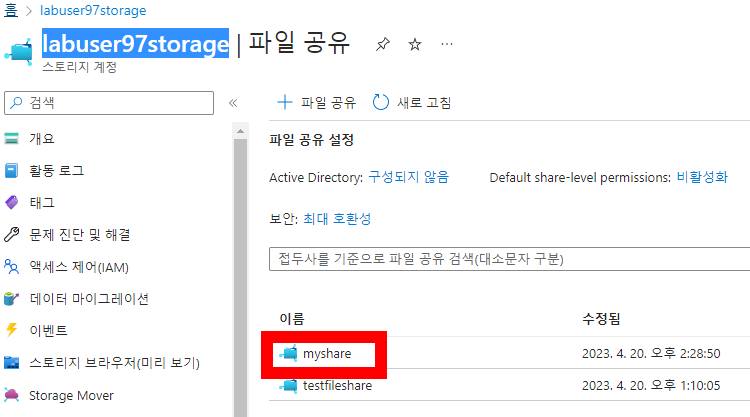

- 그림과 같이 파일공유 파일이 만들어진다.

## 4) 디렉토리 만들기

In [ ]:
file_service.create_directory('myshare','sampledir')

True

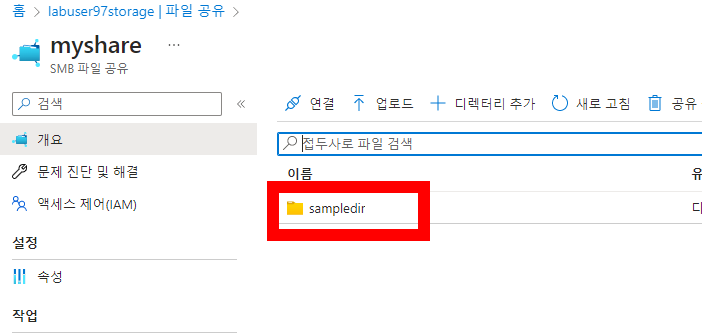

- 파일공유 안에 입력한 디렉토리 폴더가 만들어진다.

In [ ]:
from azure.storage.file import ContentSettings
file_service.create_file_from_path(
    'myshare',
    None,
    'myfile.jpg',
    'img.jpg'
)

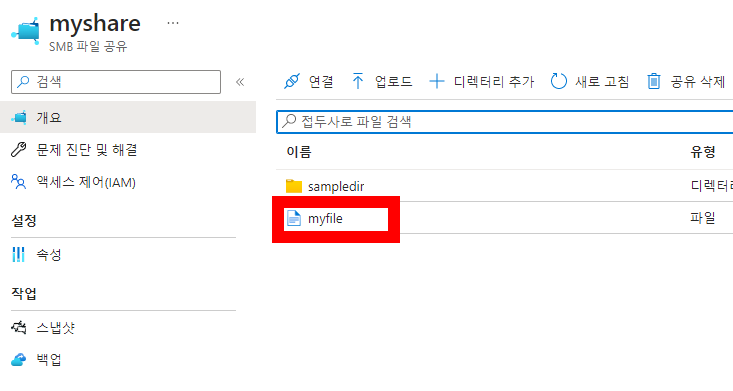

- myfile 이란 이름으로 카피되었음

## 5) 디렉토리 내용 확인하기

In [ ]:
generator = file_service.list_directories_and_files('myshare')
for file_or_dir in generator:
  print(file_or_dir.name)

myfile
myfile.jpg
sampledir


## 6) 파일 가져오기

In [ ]:
file_service.get_file_to_path('myshare',None,'myfile','jpg_DOWNLOAD.jpg')

## 7) Snapshot 남기기

In [ ]:
metadata = {'foo' : 'bar'}
snapshot = file_service.snapshot_share('myshare',metadata=metadata)

In [ ]:
share = list(file_service.list_shares(include_snapshots=True))

## 8) Snapshot 확인하기

In [ ]:
directories_and_file = list(file_service.list_directories_and_files('myshare',snapshot='2023-04-20T05:48:36.0000000Z'))
for file_or_dir in directories_and_file:
  print(file_or_dir.name)


myfile
myfile.jpg
sampledir


## 9) Snapshot 삭제하기

In [ ]:
file_service.delete_share('myshare',snapshot='2023-04-20T05:48:36.0000000Z')

True

- myshare 에 있는 가장 위에 파일 없애고 싶은 경우

In [ ]:
file_service.delete_file('myshare',None,'myfile')

- myshare 삭제하고 싶은 경우

In [ ]:
file_service.delete_share('myshare')

ERROR:azure.storage.common.storageclient:Client-Request-ID=04c8dfcc-df44-11ed-8492-0242ac1c000c Retry policy did not allow for a retry: Server-Timestamp=Thu, 20 Apr 2023 06:24:34 GMT, Server-Request-ID=ed780faf-801a-0028-5350-73c50c000000, HTTP status code=409, Exception=The share has snapshots and the operation requires no snapshots. ErrorCode: ShareHasSnapshots<?xml version="1.0" encoding="utf-8"?><Error><Code>ShareHasSnapshots</Code><Message>The share has snapshots and the operation requires no snapshots.RequestId:ed780faf-801a-0028-5350-73c50c000000Time:2023-04-20T06:24:34.9955628Z</Message></Error>.


AzureConflictHttpError: ignored

- 에러가 나는 경우에는, 스냅샷이 남아있기 때문에 삭제가 안되는 것!